In [25]:
#importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
# loading the dataset
df = pd.read_csv("California_Fire_Incidents.csv")
df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('-', '')

In [4]:
df.head()  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      105 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [5]:
df.isnull().sum().sort_values(ascending=False)

StructuresEvacuated     1636
FuelType                1624
Fatalities              1615
AirTankers              1608
StructuresThreatened    1606
StructuresDamaged       1569
Helicopters             1552
ControlStatement        1531
Injuries                1516
Dozers                  1513
WaterTenders            1490
CrewsInvolved           1465
StructuresDestroyed     1461
Engines                 1445
PersonnelInvolved       1432
ConditionStatement      1352
SearchKeywords           203
Extinguished              59
SearchDescription         17
PercentContained           3
AcresBurned                3
Latitude                   0
Started                    0
Updated                    0
UniqueId                   0
AdminUnit                  0
ArchiveYear                0
Counties                   0
CalFireIncident            0
Status                     0
Featured                   0
Location                   0
Final                      0
Public                     0
CanonicalUrl  

In [17]:
print("Clean Data")
df.info()
df.head()

Clean Data
<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 0 to 1632
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1601 non-null   float64            
 1   Active                1601 non-null   bool               
 2   AdminUnit             1601 non-null   object             
 3   AirTankers            28 non-null     float64            
 4   ArchiveYear           1601 non-null   int64              
 5   CalFireIncident       1601 non-null   bool               
 6   CanonicalUrl          1601 non-null   object             
 7   ConditionStatement    278 non-null    object             
 8   ControlStatement      105 non-null    object             
 9   Counties              1601 non-null   object             
 10  CountyIds             1601 non-null   object             
 11  CrewsInvolved         171 non-null    float64            
 12  

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,StartYear,StartMonth,LargeFire
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,2013,8,1
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,2013,5,1
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,2013,7,1
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,2013,8,1
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,2013,5,1


In [20]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [6]:
df['Started'] = pd.to_datetime(df['Started'], errors='coerce')


In [7]:
# Drop missing date or burned area
df = df.dropna(subset=['Started', 'AcresBurned'])

In [8]:
# Fill missing acres and remove zero entries
df['AcresBurned'] = df['AcresBurned'].fillna(0)
df = df[df['AcresBurned'] > 0]


In [9]:
print(df.columns.tolist())


['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear', 'CalFireIncident', 'CanonicalUrl', 'ConditionStatement', 'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers', 'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final', 'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location', 'Longitude', 'MajorIncident', 'Name', 'PercentContained', 'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords', 'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated', 'WaterTenders']


In [10]:
# Extract useful time-based features
df['StartYear'] = df['Started'].dt.year
df['StartMonth'] = df['Started'].dt.month

# A "Large Fire" is defined as burning more than 1000 acres
df['LargeFire'] = (df['AcresBurned'] > 1000).astype(int)

# Optional: Check resulting feature distribution
print(df[['StartMonth', 'StartYear', 'AcresBurned', 'LargeFire']].head())


   StartMonth  StartYear  AcresBurned  LargeFire
0           8       2013     257314.0          1
1           5       2013      30274.0          1
2           7       2013      27531.0          1
3           8       2013      27440.0          1
4           5       2013      24251.0          1


In [11]:
# STEP 3: Linear Regression (OLS)
X = df[['StartMonth', 'StartYear']]
y_reg = df['AcresBurned']
# Add constant for statsmodels
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y_reg, X_ols).fit()

In [12]:
#Print summary with R², p-values
print("Full Summary of OLS Linear Regression")
print(ols_model.summary())

Full Summary of OLS Linear Regression
                            OLS Regression Results                            
Dep. Variable:            AcresBurned   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.942
Date:                Wed, 16 Jul 2025   Prob (F-statistic):             0.0531
Time:                        20:20:15   Log-Likelihood:                -18635.
No. Observations:                1601   AIC:                         3.728e+04
Df Residuals:                    1598   BIC:                         3.729e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.

In [13]:
# STEP 4: Random Forest Classification
y_clf = df['LargeFire']
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)
print(y_clf)
print(X_train)

0       1
1       1
2       1
3       1
4       1
       ..
1628    0
1629    0
1630    0
1631    0
1632    0
Name: LargeFire, Length: 1601, dtype: int32
      StartMonth  StartYear
639            6       2017
704           10       2017
716            5       2017
502            5       2016
1193           6       2018
...          ...        ...
1154           8       2018
1318           4       2018
871           10       2017
1487          10       2019
1150           6       2018

[1280 rows x 2 columns]


In [14]:
# Random Forest - Normal (Single Core)
print("\nNormal Random Forest")
start_normal = time.time()
rf_normal = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)
rf_normal.fit(X_train, y_train)
y_pred_normal = rf_normal.predict(X_test)
end_normal = time.time()

print("Accuracy:", accuracy_score(y_test, y_pred_normal))
print("Training Time at Normal:", round(end_normal - start_normal, 3), "sec")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_normal))
print("Classification Report:\n", classification_report(y_test, y_pred_normal))


Normal Random Forest
Accuracy: 0.822429906542056
Training Time at Normal: 0.125 sec
Confusion Matrix:
 [[259   7]
 [ 50   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       266
           1       0.42      0.09      0.15        55

    accuracy                           0.82       321
   macro avg       0.63      0.53      0.53       321
weighted avg       0.77      0.82      0.77       321



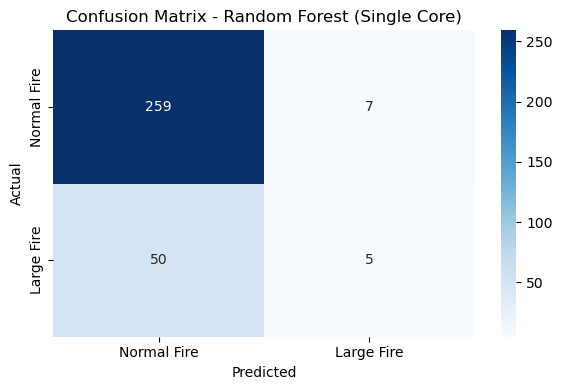

In [32]:
cm_normal = confusion_matrix(y_test, y_pred_normal)
labels = ['Normal Fire', 'Large Fire']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Single Core)')
plt.tight_layout()
plt.show()

In [15]:
# Random Forest - Parallel (All Cores) multi-cores
print("\nRandom forest for Paraller included all cores")
start_parallel = time.time()
rf_parallel = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_parallel.fit(X_train, y_train)
y_pred_parallel = rf_parallel.predict(X_test)
end_parallel = time.time()

print("Accuracy of Parallel:", accuracy_score(y_test, y_pred_parallel))
print("Training Time for Parallel:", round(end_parallel - start_parallel, 3), "sec")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_parallel))
print("Classification Report:\n", classification_report(y_test, y_pred_parallel))



Random forest for Paraller included all cores
Accuracy of Parallel: 0.822429906542056
Training Time for Parallel: 0.145 sec
Confusion Matrix:
 [[259   7]
 [ 50   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       266
           1       0.42      0.09      0.15        55

    accuracy                           0.82       321
   macro avg       0.63      0.53      0.53       321
weighted avg       0.77      0.82      0.77       321



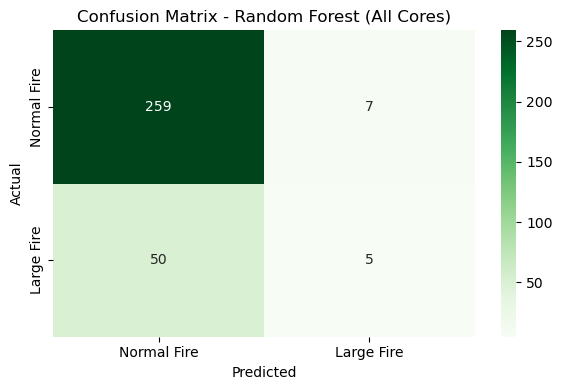

In [33]:
cm_parallel = confusion_matrix(y_test, y_pred_parallel)
labels = ['Normal Fire', 'Large Fire']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_parallel, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (All Cores)')
plt.tight_layout()
plt.show()

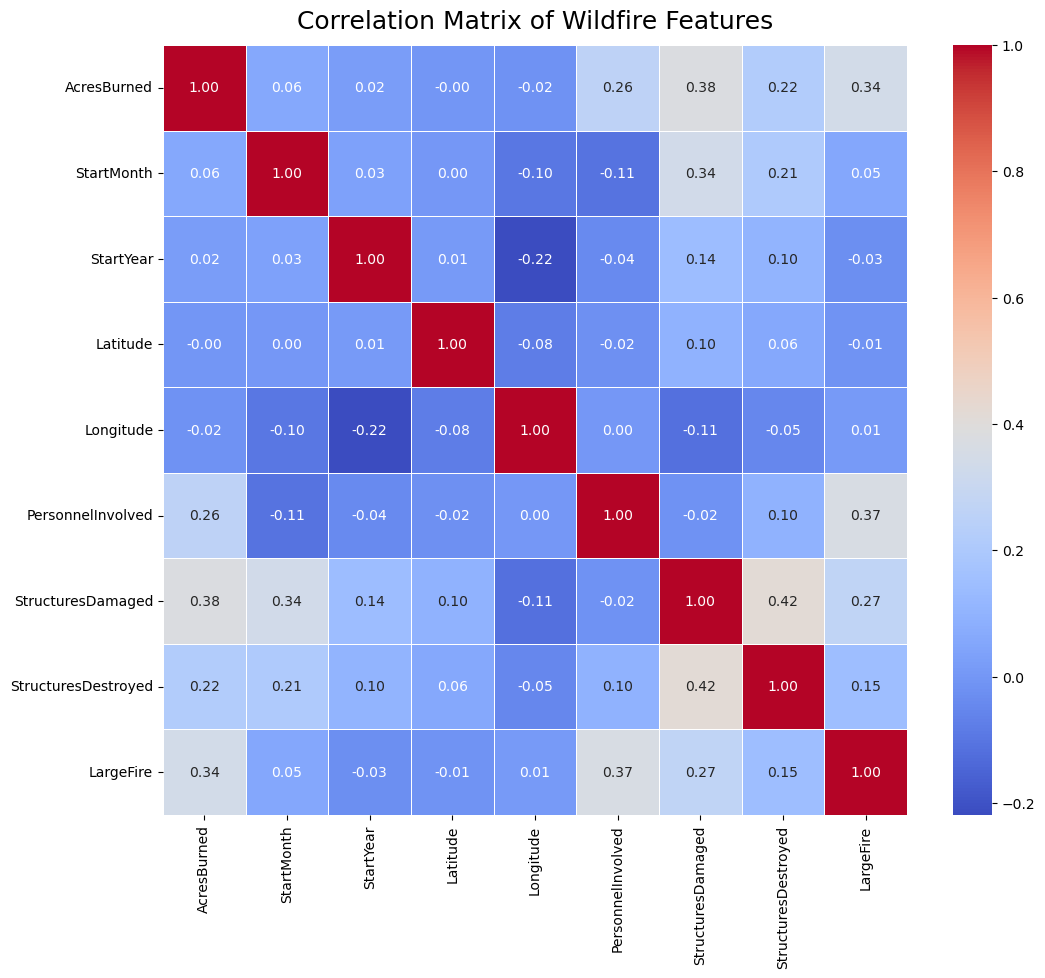

In [22]:
import seaborn as sns
df_for_heatmap = df.copy()


features_for_corr = [
    'AcresBurned','StartMonth','StartYear','Latitude','Longitude','PersonnelInvolved','StructuresDamaged','StructuresDestroyed', 'LargeFire'         
]


features_for_corr = [f for f in features_for_corr if f in df_for_heatmap.columns]


correlation_matrix = df_for_heatmap[features_for_corr].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
heatmap.set_title('Correlation Matrix of Wildfire Features', fontdict={'fontsize':18}, pad=12)
plt.show()


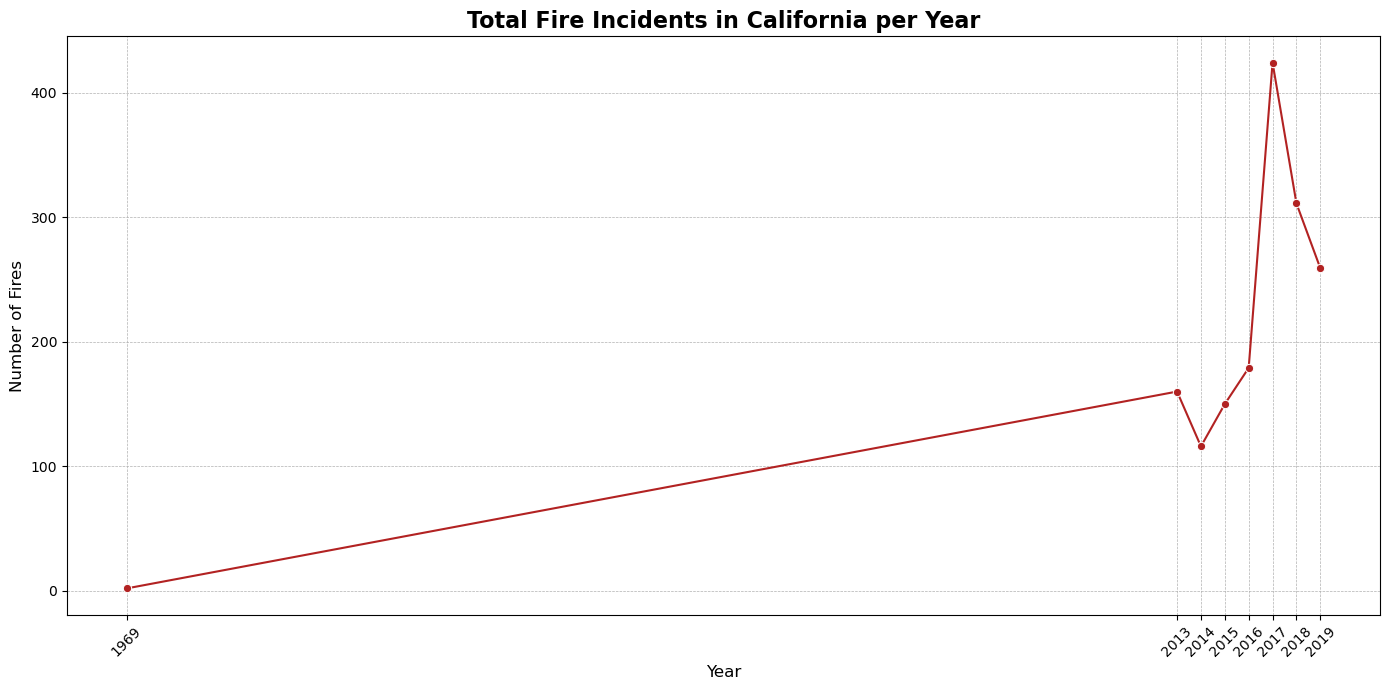

In [23]:
# Group by StartYear to count total fires
fires_per_year = df.groupby('StartYear').size().reset_index(name='fire_count')

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=fires_per_year, x='StartYear', y='fire_count', marker='o', color='firebrick')

# Chart labels and formatting
plt.title('Total Fire Incidents in California per Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.xticks(fires_per_year['StartYear'], rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\sanje\AppData\Local\Temp\ipykernel_1980\423646132.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sanje\AppData\Local\Temp\ipykernel_1980\423646132.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_labels)


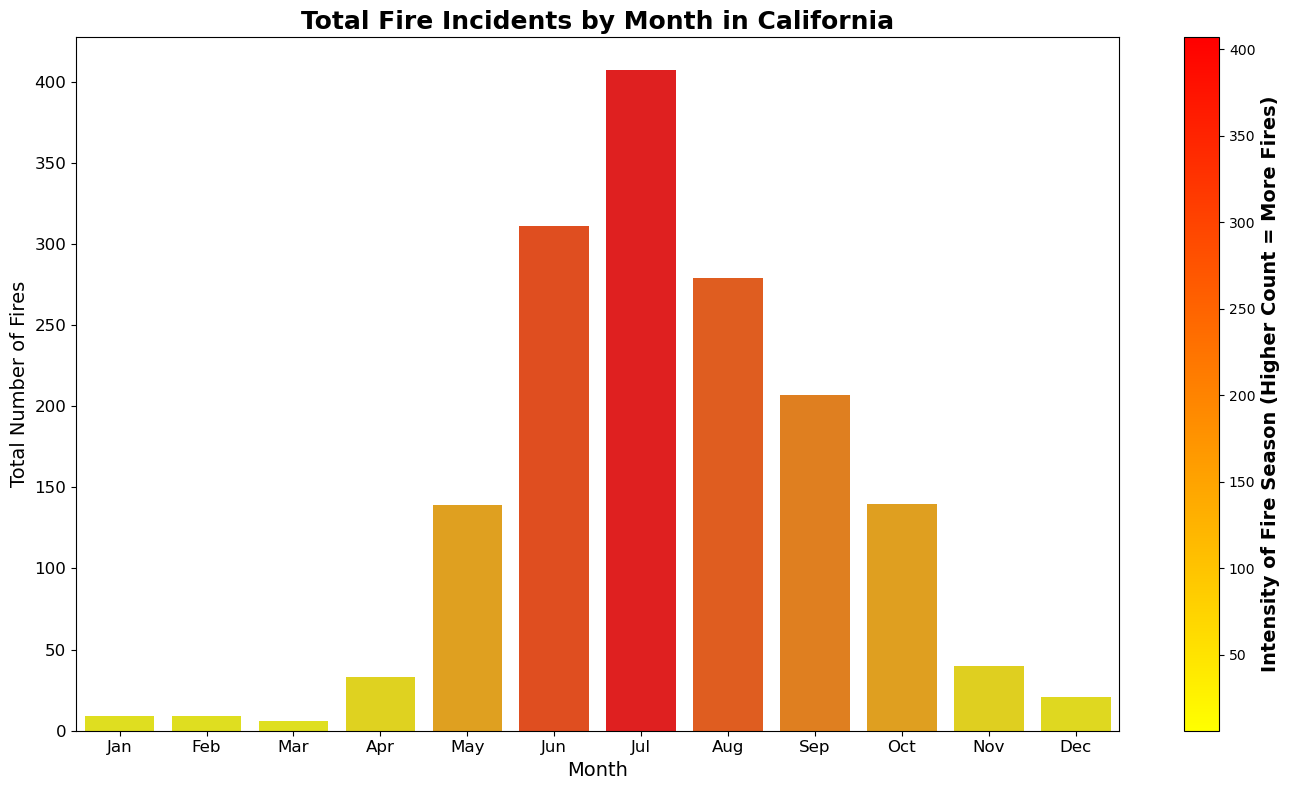

In [31]:
fires_per_month = df.groupby('StartMonth').size().reset_index(name='fire_count')
normalize = mcolors.Normalize(vmin=fires_per_month['fire_count'].min(), vmax=fires_per_month['fire_count'].max())
colormap = cm.autumn_r 

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
palette = [colormap(normalize(value)) for value in fires_per_month['fire_count']]

sns.barplot(
    data=fires_per_month,
    x='StartMonth',
    y='fire_count',
    palette=palette,
    ax=ax
)

# Title and labels
ax.set_title('Total Fire Incidents by Month in California', fontsize=18, weight='bold')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Number of Fires', fontsize=14)

# Replace x-axis values with month abbreviations
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_labels)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add color bar for intensity
scalar_mappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
cbar = fig.colorbar(scalar_mappable, ax=ax)
cbar.set_label('Intensity of Fire Season (Higher Count = More Fires)', size=14, weight='bold')

plt.tight_layout()
plt.show()


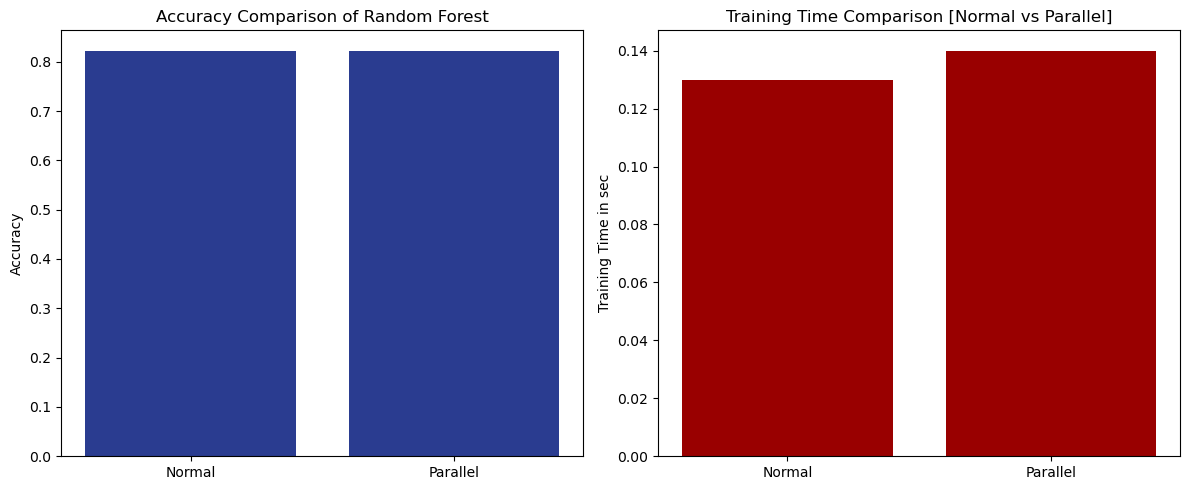

In [16]:
# STEP 5: Visualize Accuracy vs Time
labels = ['Normal', 'Parallel']
accuracy = [
    accuracy_score(y_test, y_pred_normal),
    accuracy_score(y_test, y_pred_parallel)
]
training_time = [
    round(end_normal - start_normal, 2),
    round(end_parallel - start_parallel, 2)
]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, accuracy, color='#2a3c90')
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Random Forest")

plt.subplot(1, 2, 2)
plt.bar(labels, training_time, color='#990000')
plt.ylabel("Training Time in sec")
plt.title("Training Time Comparison [Normal vs Parallel]")

plt.tight_layout()
plt.show()